<a href="https://colab.research.google.com/github/sayarghoshroy/Analysis/blob/main/discriminant_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sc
from scipy.stats import f
from scipy.stats import t
import matplotlib.pyplot as plt

# $Problem\ 4$

In [2]:
data_males = [[15, 17, 24, 14],
              [17, 15, 32, 26],
              [15, 14, 29, 23],
              [13, 12, 10, 16],
              [20, 17, 26, 28],
              [15, 21, 26, 21],
              [15, 13, 26, 22],
              [13, 5, 22, 22],
              [14, 7, 30, 17],
              [17, 15, 30, 27],
              [17, 17, 26, 20],
              [17, 20, 28, 24],
              [15, 15, 29, 24],
              [18, 19, 32, 28],
              [18, 18, 31, 27],
              [15, 14, 26, 21],
              [18, 17, 33, 26],
              [10, 14, 19, 17],
              [18, 21, 30, 29],
              [18, 21, 34, 26],
              [13, 17, 30, 24],
              [16, 16, 16, 16],
              [11, 15, 25, 23],
              [16, 13, 26, 16],
              [16, 13, 23, 21],
              [18, 18, 34, 24],
              [16, 15, 28, 27],
              [15, 16, 29, 24],
              [18, 19, 32, 23],
              [18, 16, 33, 23],
              [17, 20, 21, 21],
              [19, 19, 30, 28]]

data_females = [[13, 14, 12, 21],
                [14, 12, 14, 26],
                [12, 19, 21, 21],
                [12, 13, 10, 16],
                [11, 20, 16, 16],
                [12, 9, 14, 18],
                [10, 13, 18, 24],
                [10, 8, 13, 23],
                [12, 20, 19, 23],
                [11, 10, 11, 27],
                [12, 18, 25, 25],
                [14, 18, 13, 26],
                [14, 10, 25, 28],
                [13, 16, 23, 28],
                [16, 21, 26, 26],
                [14, 17, 14, 14],
                [16, 16, 15, 23],
                [13, 16, 23, 24],
                [2, 6, 16, 21],
                [14, 16, 22, 26],
                [14, 17, 22, 28],
                [16, 13, 16, 14],
                [15, 14, 20, 26],
                [12, 10, 12, 9],
                [14, 17, 24, 23],
                [13, 15, 18, 20],
                [11, 16, 18, 28],
                [7, 7, 19, 18],
                [12, 15, 7, 28],
                [6, 5, 6, 13]]

data_females = np.asarray(data_females)
data_males = np.asarray(data_males)
# As there are two classes
k = 2
p = data_females.shape[1]

count_females = np.shape(data_females)[0]
count_males = np.shape(data_females)[0]
total_count = count_females + count_males

mean_females = np.mean(data_females, axis = 0)
mean_males = np.mean(data_males, axis = 0)

covariance_females = np.cov(data_females.T)
covariance_males = np.cov(data_males.T)

pooled_covariance = ((count_females - 1) * covariance_females +
                     (count_males - 1) * covariance_males) / (total_count - k)

disc_coeff_vector = np.matmul(np.linalg.inv(pooled_covariance), (mean_males - mean_females))

print('Required Discriminant Function Coefficient Vector:')
print(np.ndarray.tolist(np.round(disc_coeff_vector, 4)))

Required Discriminant Function Coefficient Vector:
[0.5621, -0.2294, 0.4412, -0.2863]


In [3]:
std_coefficients = np.multiply(np.sqrt(np.diag(pooled_covariance)), disc_coeff_vector)
print('Standardised Coefficients:')
print(np.ndarray.tolist(np.round(std_coefficients, 4)))

Standardised Coefficients:
[1.4958, -0.9133, 2.3669, -1.3436]


In [4]:
def partial_hotelling_two_sample_T_square(neglect = -1):
  # neglect can take values 0, 1, ..., (p - 1)
  # if neglect = -1, consider complete two sample T square
  global pooled_covariance
  global mean_females, mean_males
  global count_females, count_males
  global p

  indices = np.asarray([index for index in range(p) if index != neglect])
  cov = []

  for row in range(p):
    if row == neglect:
      continue
    cov.append([])
    for col in range(p):
      if col == neglect:
        continue
      cov[-1].append(pooled_covariance[row, col])

  cov = np.asmatrix(cov)
  mean_1 = mean_males[indices]
  mean_2 = mean_females[indices]
  difference = mean_1 - mean_2

  factor = (mean_males * mean_females) / (mean_males + mean_females)
  T_square = np.matmul(np.matmul(difference.T, np.linalg.inv(cov)), difference)

  return np.ravel(T_square)[0]

complete_T_square = partial_hotelling_two_sample_T_square()
nu = count_females + count_males - k
factor = nu - p + 1
alpha = 0.05

critical_partial_F = f.isf(alpha, 1, factor)
print('Critical Partial F value = ' + str(np.round(critical_partial_F, 4)))
print()

partial_F_s = []
for drop in range(p):
  T_square_partial = partial_hotelling_two_sample_T_square(drop)
  F = factor * (complete_T_square - T_square_partial) / (nu + T_square_partial)
  partial_F_s.append(F)
  print('p = ' + str(drop + 1) + ': ')
  print(' • Computed Partial F value = '  + str(np.round(F, 4)))
  print(' • Standardized Coefficient = '  + str(np.round(std_coefficients[drop], 4)))
  print()

partial_F_s = np.asarray(partial_F_s)

print('Ranking variables in order of their contribution to separating the groups.')
print('Based on:')
print(' • Computed Partial F value = '  + str(1 + np.argsort(-1 * np.abs(partial_F_s))))
print(' • Standardized Coefficient = '  + str(1 + np.argsort(-1 * np.abs(std_coefficients))))

Critical Partial F value = 4.0162

p = 1: 
 • Computed Partial F value = 1.189
 • Standardized Coefficient = 1.4958

p = 2: 
 • Computed Partial F value = 0.4386
 • Standardized Coefficient = -0.9133

p = 3: 
 • Computed Partial F value = 3.2927
 • Standardized Coefficient = 2.3669

p = 4: 
 • Computed Partial F value = 1.0822
 • Standardized Coefficient = -1.3436

Ranking variables in order of their contribution to separating the groups.
Based on:
 • Computed Partial F value = [3 1 4 2]
 • Standardized Coefficient = [3 1 4 2]


# $Problem\ 5$

In [5]:
method_1 = [[5.4, 6.0, 6.3, 6.7],
            [5.2, 6.2, 6.0, 5.8],
            [6.1, 5.9, 6.0, 7.0],
            [4.8, 5.0, 4.9, 5.0],
            [5.0, 5.7, 5.0, 6.5],
            [5.7, 6.1, 6.0, 6.6],
            [6.0, 6.0, 5.8, 6.0],
            [4.0, 5.0, 4.0, 5.0],
            [5.7, 5.4, 4.9, 5.0],
            [5.6, 5.2, 5.4, 5.8],
            [5.8, 6.1, 5.2, 6.4],
            [5.3, 5.9, 5.8, 6.0]]

method_2 = [[5.0, 5.3, 5.3, 6.5],
            [4.8, 4.9, 4.2, 5.6],
            [3.9, 4.0, 4.4, 5.0],
            [4.0, 5.1, 4.8, 5.8],
            [5.6, 5.4, 5.1, 6.2],
            [6.0, 5.5, 5.7, 6.0],
            [5.2, 4.8, 5.4, 6.0],
            [5.3, 5.1, 5.8, 6.4],
            [5.9, 6.1, 5.7, 6.0],
            [6.1, 6.0, 6.1, 6.2],
            [6.2, 5.7, 5.9, 6.0],
            [5.1, 4.9, 5.3, 4.8]]

method_3 = [[4.8, 5.0, 6.5, 7.0],
            [5.4, 5.0, 6.0, 6.4],
            [4.9, 5.1, 5.9, 6.5],
            [5.7, 5.2, 6.4, 6.4],
            [4.2, 4.6, 5.3, 6.3],
            [6.0, 5.3, 5.8, 5.4],
            [5.1, 5.2, 6.2, 6.5],
            [4.8, 4.6, 5.7, 5.7],
            [5.3, 5.4, 6.8, 6.6],
            [4.6, 4.4, 5.7, 5.6],
            [4.5, 4.0, 5.0, 5.9],
            [4.4, 4.2, 5.6, 5.5]]

method_1 = np.asarray(method_1)
method_2 = np.asarray(method_2)
method_3 = np.asarray(method_3)
methods = [method_1, method_2, method_3]

all_data = np.vstack(methods)

# As there are three methods
k = 3
n = methods[0].shape[0]
p = methods[0].shape[1]
N = all_data.shape[0]

total_mean = np.mean(all_data, 0)
means = []

for method in methods:
  means.append(np.mean(method, 0))

In [6]:
# Computing between Sum of Squares
H = np.zeros((p, p))
for mean in means:
  unit = np.asmatrix(mean - total_mean)
  H += np.matmul(unit.T, unit)

H = n * H

In [7]:
# Computing within Sum of Squares
E = np.zeros((p, p))

for i in range(k):
  for j in range(n):
    unit = np.asmatrix(methods[i][j] - means[i])
    E += np.matmul(unit.T, unit)

consider = np.matmul(np.linalg.inv(E), H)

In [8]:
# Computing eigenvectors of inverse(E).H

eigen_values, eigen_vectors = np.linalg.eig(consider)
positions = np.argsort(-1 * eigen_values)

for vector_index, index in enumerate(positions):
  print('Eigen Vector ' + str(vector_index + 1) + ' = ')
  print(np.ndarray.tolist(np.round(eigen_vectors[:, index], 4)))
  print()

Eigen Vector 1 = 
[-0.013, 0.8274, -0.5496, -0.1149]

Eigen Vector 2 = 
[0.6057, -0.5857, -0.5088, 0.1767]

Eigen Vector 3 = 
[-0.2557, 0.0156, -0.4918, 0.8322]

Eigen Vector 4 = 
[0.8065, -0.3107, -0.0554, 0.4999]



In [9]:
# Tests of significance

In [10]:
# Computing relative importance of each eigen vector based on the eigen values

sum_eigen_values = np.sum(eigen_values)

print('Contribution of:')
for vector_index, index in enumerate(positions):
  print(' • Eigen Vector ' + str(vector_index + 1) + ' = ', end = '')
  print(np.abs(np.round(eigen_values[index] / sum_eigen_values, 4)))

Contribution of:
 • Eigen Vector 1 = 0.9535
 • Eigen Vector 2 = 0.0465
 • Eigen Vector 3 = 0.0
 • Eigen Vector 4 = 0.0


In [11]:
principal_eigen_vector = eigen_vectors[:, positions[0]]
print('Discriminant Function Coefficient Vector:')
print(np.ndarray.tolist(np.round(principal_eigen_vector, 4)))
print()

S_pl = E / (N - k)
std_coefficients = np.multiply(np.sqrt(np.diag(S_pl)), principal_eigen_vector)
print('Standardised Coefficients:')
print(np.ndarray.tolist(np.round(std_coefficients, 4)))

Discriminant Function Coefficient Vector:
[-0.013, 0.8274, -0.5496, -0.1149]

Standardised Coefficients:
[-0.0083, 0.41, -0.326, -0.0668]


In [12]:
def partial_Wilk_s_two_sample_T_square(neglect = -1):
  # neglect can take values 0, 1, ..., (p - 1)
  # if neglect = -1, consider complete two sample T square
  global H, E

  if neglect == -1:
    return np.linalg.det(E) / np.linalg.det(H + E)

  indices = np.asarray([index for index in range(p) if index != neglect])
  H_consider = []
  E_consider = []

  for row in range(p):
    if row == neglect:
      continue
    H_consider.append([])
    E_consider.append([])
    
    for col in range(p):
      if col == neglect:
        continue
      H_consider[-1].append(H[row, col])
      E_consider[-1].append(E[row, col])

  H_consider = np.asmatrix(H_consider)
  E_consider = np.asmatrix(E_consider)
  
  wilk_s = np.linalg.det(E_consider) / np.linalg.det(H_consider + E_consider)

  return wilk_s

In [13]:
nu_E = N - k
nu_H = k - 1
alpha = 0.05
factor = (nu_E - p + 1) / nu_H

critical_partial_F = f.isf(alpha, nu_H, nu_E - p + 1)
print('Critical Partial F value = ' + str(np.round(critical_partial_F, 4)))
print()

wilk_s_total = partial_Wilk_s_two_sample_T_square()

partial_F_s = []
for drop in range(p):
  wilk_s = partial_Wilk_s_two_sample_T_square(drop) / wilk_s_total
  F = factor * (1 - wilk_s) / wilk_s
  partial_F_s.append(F)
  
  print('p = ' + str(drop + 1) + ': ')
  print(' • Computed Partial F value = '  + str(np.round(F, 4)))
  print(' • Standardized Coefficient = '  + str(np.round(std_coefficients[drop], 4)))
  print()

partial_F_s = np.asarray(partial_F_s)

print('Ranking variables in order of their contribution to separating the groups.')
print('Based on:')
print(' • Computed Partial F value = '  + str(1 + np.argsort(-1 * np.abs(partial_F_s))))
print(' • Standardized Coefficient = '  + str(1 + np.argsort(-1 * np.abs(std_coefficients))))

Critical Partial F value = 3.3158

p = 1: 
 • Computed Partial F value = -1.0668
 • Standardized Coefficient = -0.0083

p = 2: 
 • Computed Partial F value = -8.3064
 • Standardized Coefficient = 0.41

p = 3: 
 • Computed Partial F value = -6.1863
 • Standardized Coefficient = -0.326

p = 4: 
 • Computed Partial F value = -0.483
 • Standardized Coefficient = -0.0668

Ranking variables in order of their contribution to separating the groups.
Based on:
 • Computed Partial F value = [2 3 1 4]
 • Standardized Coefficient = [2 3 4 1]


$Partial\ F\ does\ not\ rank\ the\ variables\ in\ the\ same\ order\ as\ standardized\ coefficitents.$

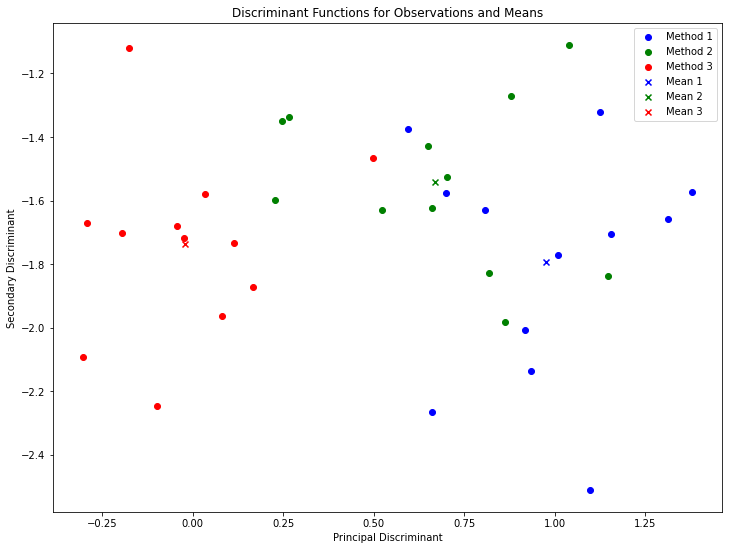

In [14]:
# Constructing the Plots
x = [[], [], [], []]
y = [[], [], [], []]

for index in range(N):
  unit = all_data[index]
  x[int(index / n)].append(np.dot(eigen_vectors[:, positions[0]], unit))
  y[int(index / n)].append(np.dot(eigen_vectors[:, positions[1]], unit))

for index in range(k):
  unit = means[index]
  x[k].append(np.dot(eigen_vectors[:, positions[0]], unit))
  y[k].append(np.dot(eigen_vectors[:, positions[1]], unit))

fig = plt.figure(figsize = (12, 9))
p = fig.add_subplot('111')
p.set_title('Discriminant Functions for Observations and Means')
p.set_xlabel('Principal Discriminant')
p.set_ylabel('Secondary Discriminant')
p.scatter(x[0], y[0], color = 'blue', label = 'Method 1')
p.scatter(x[1], y[1], color = 'green', label = 'Method 2')
p.scatter(x[2], y[2], color = 'red', label = 'Method 3')
p.scatter(x[3][0], y[3][0], color = 'blue', label = 'Mean 1', marker = 'x')
p.scatter(x[3][1], y[3][1], color = 'green', label = 'Mean 2', marker = 'x')
p.scatter(x[3][2], y[3][2], color = 'red', label = 'Mean 3', marker = 'x')
p.legend()
plt.show()

In [15]:
# ^_^ Thank You